In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("car_fuel_efficiency.csv", 
                   usecols=['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg'])
data.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [6]:
data.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


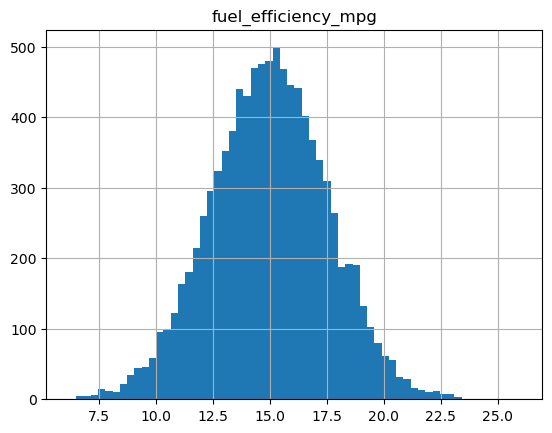

In [8]:
data.hist('fuel_efficiency_mpg', bins='auto')
plt.show()

In [9]:
# Q1
na_cols = [feat for feat in data.columns if data[feat].isna().sum() > 0]
na_cols

['horsepower']

In [10]:
# Q2
data['horsepower'].median()

np.float64(149.0)

In [12]:
# shuffle
np.random.seed(42)
n = len(data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

n, n_train, n_val, n_test, n_train + n_val + n_test

(9704, 5824, 1940, 1940, 9704)

In [13]:
# split the data
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train + n_val]]
data_test = data.iloc[idx[n_train + n_val:]]

data_train.shape, data_val.shape, data_test.shape

((5824, 5), (1940, 5), (1940, 5))

In [14]:
# reset index in dataframes
data_train.reset_index(drop=True, inplace=True)
data_val.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

In [15]:
data_train.sample(2)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
1657,160,135.0,3015.217604,2013,14.259072
5533,130,155.0,3015.706934,2013,15.569343


In [16]:
# log transformation
y_train = np.log1p(data_train.fuel_efficiency_mpg)
y_val = np.log1p(data_val.fuel_efficiency_mpg)
y_test = np.log1p(data_test.fuel_efficiency_mpg)

In [17]:
# delete target variable
del data_train['fuel_efficiency_mpg']
del data_val['fuel_efficiency_mpg']
del data_test['fuel_efficiency_mpg']

In [48]:
# functions: NAs imputation with 0 and mean
def prepare_X_fillna_value(df):
    df['horsepower'] = df['horsepower'].fillna(0)
    X = df.values
    return X

def prepare_X_fillna_mean(df):
    df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
    X = df.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [49]:
# Option 1
X_train = prepare_X_fillna_value(data_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(data_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred).round(2)

/var/folders/w3/89f27g595491mxdhd1r3_q040000gn/T/ipykernel_89308/2482232297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].fillna(0)


np.float64(0.04)

In [50]:
# Option 2
X_train = prepare_X_fillna_mean(data_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(data_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred).round(2)

/var/folders/w3/89f27g595491mxdhd1r3_q040000gn/T/ipykernel_89308/2482232297.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
/var/folders/w3/89f27g595491mxdhd1r3_q040000gn/T/ipykernel_89308/360211719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].fillna(0)


np.float64(0.04)

In [51]:
# regularizarion
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [59]:
# Q4
X_train = prepare_X_fillna_value(data_train)
X_val = prepare_X_fillna_value(data_val)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred).round(2)
    print(f"r = {r}, score = {score}")

r = 0, score = 0.04
r = 0.01, score = 0.04
r = 0.1, score = 0.04
r = 1, score = 0.04
r = 5, score = 0.04
r = 10, score = 0.04
r = 100, score = 0.04


/var/folders/w3/89f27g595491mxdhd1r3_q040000gn/T/ipykernel_89308/2482232297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].fillna(0)


In [65]:
# Q6
tot_score = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    n = len(data)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    idx = np.arange(n)
    np.random.shuffle(idx)

    # split the data
    data_train = data.iloc[idx[:n_train]]
    data_val = data.iloc[idx[n_train:n_train + n_val]]
    data_test = data.iloc[idx[n_train + n_val:]]

    # reset index in datasets
    data_train.reset_index(drop=True, inplace=True)
    data_val.reset_index(drop=True, inplace=True)
    data_test.reset_index(drop=True, inplace=True)

    # log transformation
    y_train = np.log1p(data_train.fuel_efficiency_mpg)
    y_val = np.log1p(data_val.fuel_efficiency_mpg)
    y_test = np.log1p(data_test.fuel_efficiency_mpg)

    # delete target variable
    del data_train['fuel_efficiency_mpg']
    del data_val['fuel_efficiency_mpg']
    del data_test['fuel_efficiency_mpg']

    X_train = prepare_X_fillna_value(data_train)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X_fillna_value(data_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    tot_score.append(score)
    print(f"seed = {seed}, score = {score}")

seed = 0, score = 0.038017755370878016
seed = 1, score = 0.03927885333937289
seed = 2, score = 0.039446530525595394
seed = 3, score = 0.03872763703882251
seed = 4, score = 0.03727535850105435
seed = 5, score = 0.039384388339929174
seed = 6, score = 0.03890763931346171
seed = 7, score = 0.038379716269399754
seed = 8, score = 0.04018986975346067
seed = 9, score = 0.03860764644126977


/var/folders/w3/89f27g595491mxdhd1r3_q040000gn/T/ipykernel_89308/2482232297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].fillna(0)


In [66]:
np.std(tot_score).round(3)

np.float64(0.001)

In [68]:
# Q7
# shuffle
np.random.seed(9)
n = len(data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.shuffle(idx)
    
# split the data
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train + n_val]]
data_test = data.iloc[idx[n_train + n_val:]]
    
# reset index in df's
data_train.reset_index(drop=True, inplace=True)
data_val.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)
    
# log transformation
y_train = np.log1p(data_train.fuel_efficiency_mpg)
y_val = np.log1p(data_val.fuel_efficiency_mpg)
y_test = np.log1p(data_test.fuel_efficiency_mpg)
    
# delete target variable
del data_train['fuel_efficiency_mpg']
del data_val['fuel_efficiency_mpg']
del data_test['fuel_efficiency_mpg']

# combine train and validation datasets
data_full_train = pd.concat([data_train, data_val])
data_full_train = data_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

# appling functions
X_data_full_train = prepare_X_fillna_value(data_full_train)
w0, w = train_linear_regression_reg(X_data_full_train, y_full_train, r=0.001)
X_test = prepare_X_fillna_value(data_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred).round(2)
print(score)

0.04


/var/folders/w3/89f27g595491mxdhd1r3_q040000gn/T/ipykernel_89308/2482232297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].fillna(0)
